Importing the necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading the exams dataset into the dataframe

In [4]:
exams_data = pd.read_csv("C:\\Users\\HP\\Desktop\\projects\\exam analysis\\exams (2).csv")

The head() function is used to return the first n rows of a DataFrame. In this case, it will return the first 30 rows of the "exams_data" DataFrame.

In [5]:
exams_data.head(30)


,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Checking for missing Values
This code uses the isnull() method of a pandas DataFrame exams_data to check for missing values in the dataset. It then sums up the number of missing values in each column of the DataFrame using the sum() method. Finally, it filters out the columns that do not have any missing values by using the condition missingvalues>0

In [6]:
missingvalues = exams_data.isnull().sum()
missingvalues = missingvalues[missingvalues>0]
missingvalues

Series([], dtype: int64)

No columns with missing values

In [7]:
print('Number of duplicates = ', exams_data.duplicated().sum())

Number of duplicates =  0


In [8]:
exams_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
 6   reading                 1000 non-null   int64 
 7   writing                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
exams_data.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
exams_data.shape

(1000, 8)

Summary
the table contains 1000 rows and 8 columns
all entries are of expected data type
no missing values are detected
no duplicates are detected

Running a premilinary Data Analysis

1. What are the average reading scores for students with/without the test preparation course?

In [11]:
exams_data.groupby("test_prep_course")[["reading", "writing", "math"]].mean()

,reading,writing,math
test_prep_course,,,
completed,73.893855,74.418994,69.695531
none,66.534268,64.504673,64.077882


<AxesSubplot:xlabel='test_prep_course', ylabel='math'>

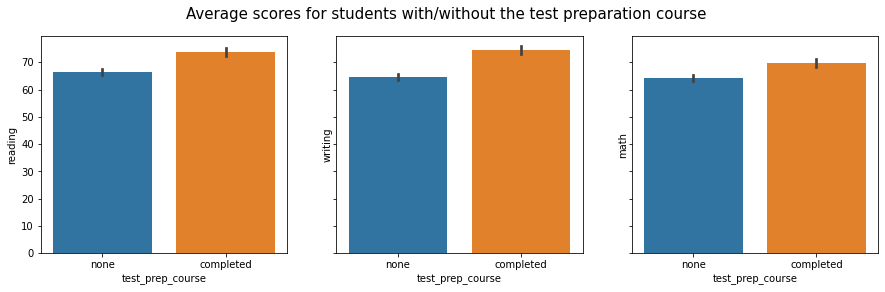

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
fig.suptitle('Average scores for students with/without the test preparation course', fontsize=15)
sns.barplot(ax=axes[0], x='test_prep_course', y='reading', data=exams_data)
sns.barplot(ax=axes[1], x='test_prep_course', y='writing', data=exams_data)
sns.barplot(ax=axes[2], x='test_prep_course', y='math', data=exams_data)

Averagely, the students that completed the test preparation course did better in their courses than those who didn't take the course

2. What are the average scores for the different parental education levels?

In [13]:
exams_data.groupby("parent_education_level")["reading", "writing","math"].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_14160\4025556899.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  exams_data.groupby("parent_education_level")["reading", "writing","math"].mean()


,reading,writing,math
parent_education_level,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


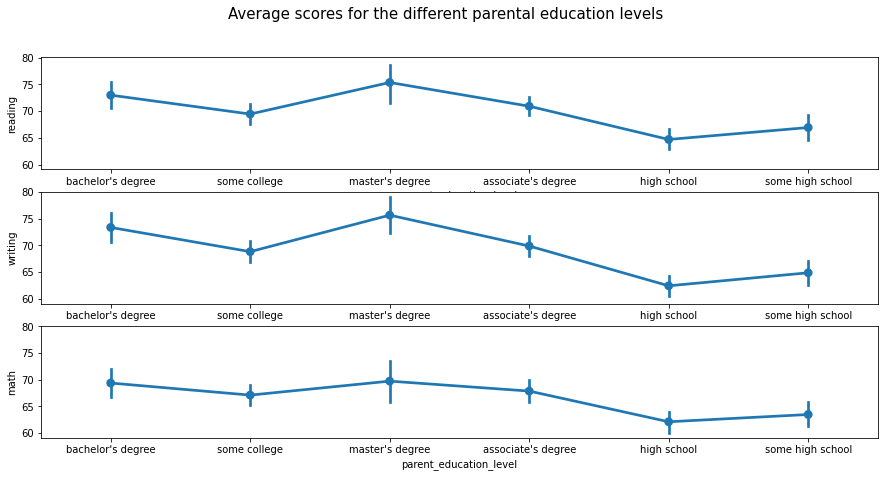

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(15, 7), sharey=True)
fig.suptitle('Average scores for the different parental education levels', fontsize=15)
sns.pointplot(ax=axes[0], x='parent_education_level', y='reading', data=exams_data)
sns.pointplot(ax=axes[1], x='parent_education_level', y='writing', data=exams_data)
sns.pointplot(ax=axes[2], x='parent_education_level', y='math', data=exams_data)
plt.show()


Averagely, students whose parents had a master's degree did better than those whose parents did not.

[Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels

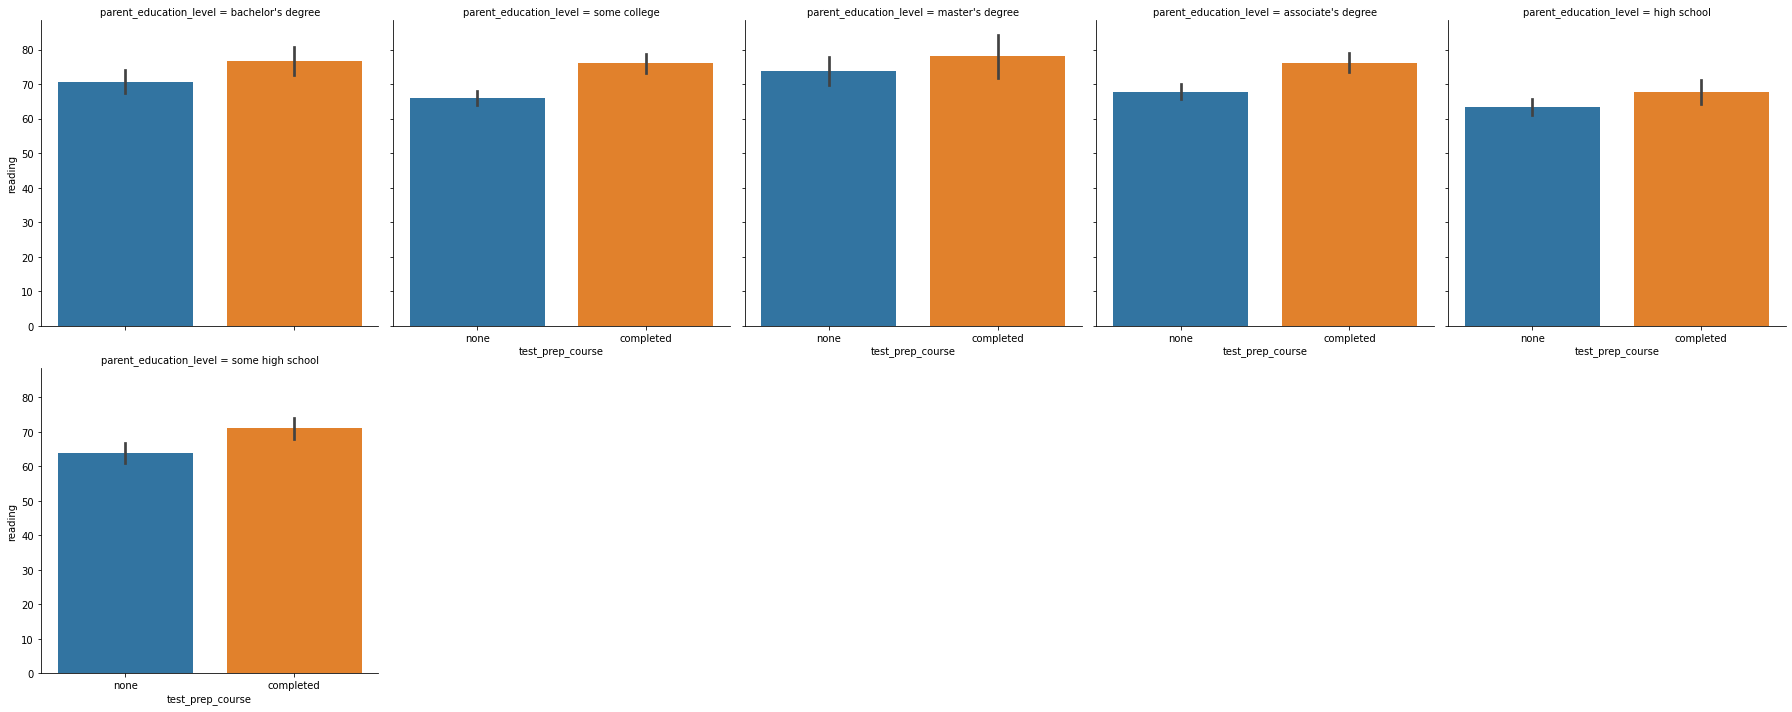

In [15]:
#for reading test
sns.catplot(x='test_prep_course', y='reading', col='parent_education_level', data=exams_data, kind='bar', col_wrap=5)
plt.show()

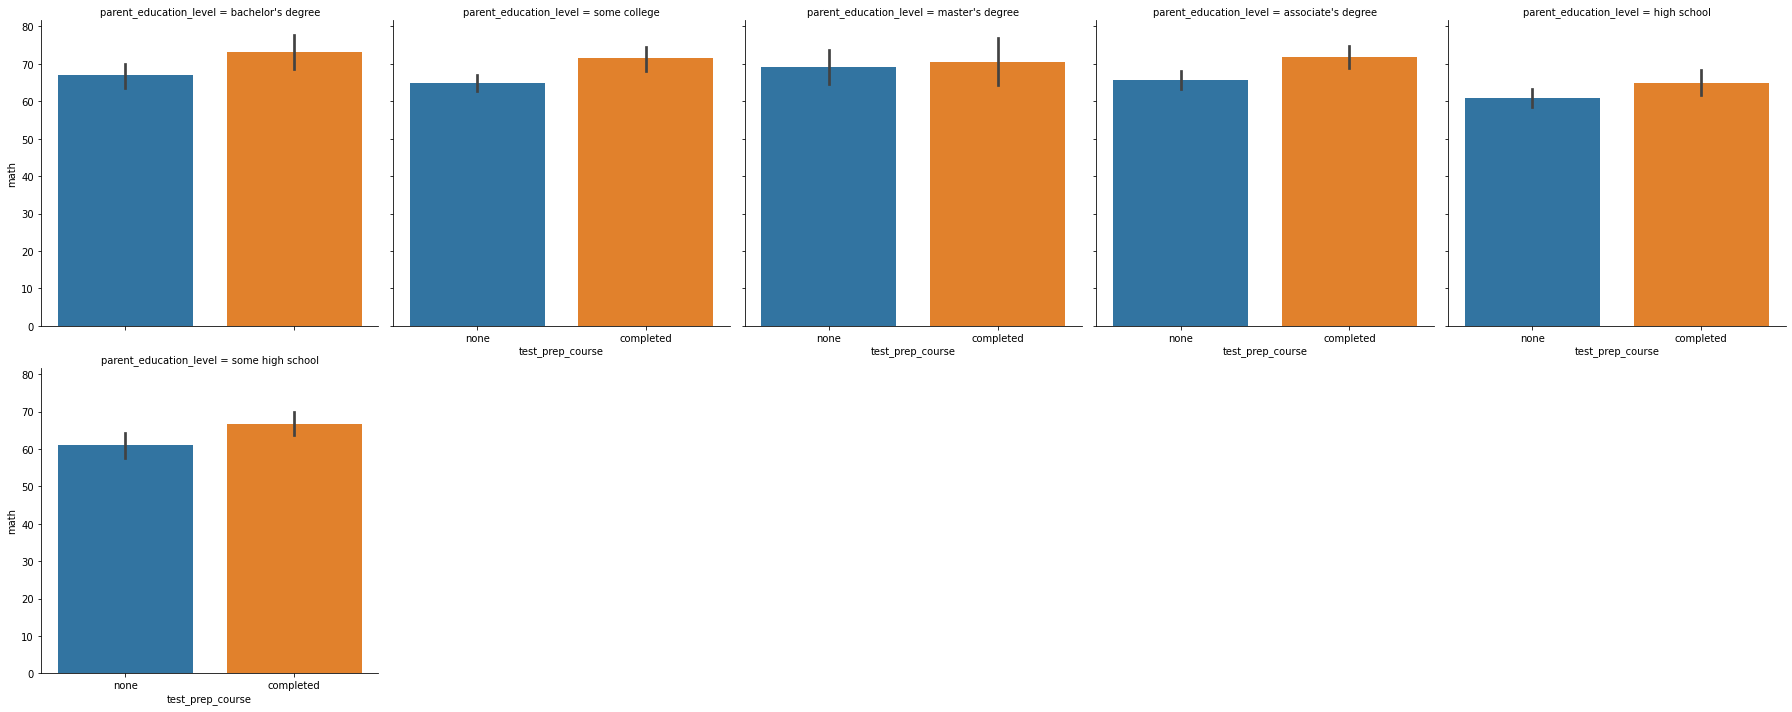

In [16]:
#for math test
sns.catplot(x='test_prep_course', y='math', col='parent_education_level', data=exams_data, kind='bar', col_wrap=5)
plt.show()

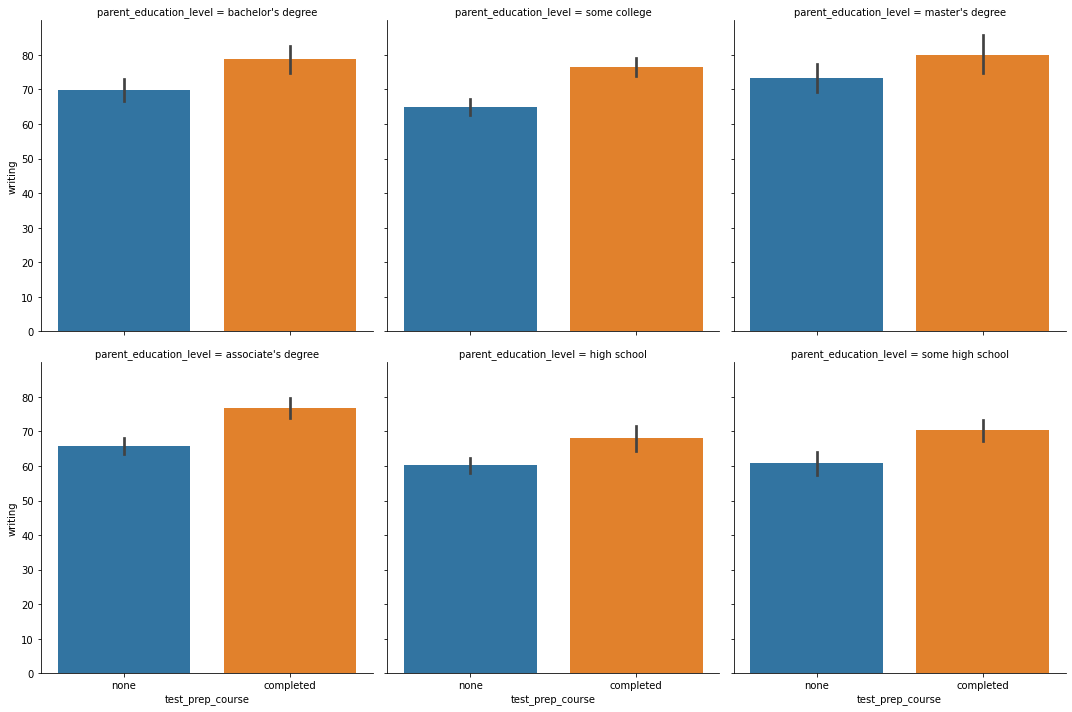

In [17]:
sns.catplot(x='test_prep_course', y='writing', col='parent_education_level', data=exams_data, kind='bar', col_wrap=3)
plt.show()

students who prepared fot the course by taking thepre test had higher scores than those who didn't irrespective of their parent's level of education.

[Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

In [19]:
exams_data.groupby('test_prep_course')[['reading', 'writing', 'math']].mean()

,reading,writing,math
test_prep_course,,,
completed,73.893855,74.418994,69.695531
none,66.534268,64.504673,64.077882


In [21]:
#sorting te scores in ascendindg order
exams_data.sort_values(['reading', 'writing', 'math'], ascending=False).head(30)

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
179,female,group D,some high school,standard,completed,97,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
957,female,group D,master's degree,standard,none,92,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100


averagely, students who perform well in a course also did well in other courses.